In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
for i in range(67):    
    plt.figure(figsize=(15,7))
    plt.plot(cums[i]["value"])
    a = plt.twinx()
    a.plot(cums[i]["res_htm"], "orange")
    a.plot(cums[i]["is_anomaly"], "red")
    plt.savefig(f"data_plots/YahooHTM/{i}.png")
    plt.close()

NameError: name 'cums' is not defined

<Figure size 1080x504 with 0 Axes>

In [4]:
numenta_results = []
skyline_results = []
knn_results = []
cadose_results = []
originals = []
for i in range(1, 68):
    numenta_results.append(pd.read_csv(f"data_results/NumentaDetectorTM/NumentaDetectorTM_real_{i}.csv"))
    skyline_results.append(pd.read_csv(f"data_results/EarthgeckoSkylineDetector/EarthgeckoSkylineDetector_real_{i}.csv"))
    knn_results.append(pd.read_csv(f"data_results/KnncadDetector/KnncadDetector_real_{i}.csv"))
    cadose_results.append(pd.read_csv(f"data_results/ContextOSEDetector/ContextOSEDetector_real_{i}.csv"))
    originals.append(pd.read_csv(f"data/Yahoo/real_{i}.csv"))    

In [5]:
cums = []
for i in range(67):
    cums.append(originals[i].copy())
    cums[i]["timestamp"] = numenta_results[i]["timestamp"]
    cums[i]["res_htm"] = numenta_results[i]["anomaly_score"]
    cums[i]["res_earthgecko"] = skyline_results[i]["anomaly_score"]
    cums[i]["res_cadose"] = cadose_results[i]["anomaly_score"]
    cums[i]["res_knn"] = knn_results[i]["anomaly_score"]
    print(cums[i].shape[0], "->", end=" ")
#     cums[i] = cums[i][int(cums[i].shape[0] * 0.15): ]
    print(cums[i].shape[0])

1420 -> 1420
1439 -> 1439
1461 -> 1461
1423 -> 1423
1439 -> 1439
1439 -> 1439
1423 -> 1423
1420 -> 1420
1461 -> 1461
1439 -> 1439
1439 -> 1439
1439 -> 1439
1439 -> 1439
1439 -> 1439
1439 -> 1439
1461 -> 1461
1424 -> 1424
1461 -> 1461
1424 -> 1424
1422 -> 1422
1420 -> 1420
1420 -> 1420
1420 -> 1420
1461 -> 1461
1435 -> 1435
1435 -> 1435
1427 -> 1427
1441 -> 1441
1441 -> 1441
1461 -> 1461
1427 -> 1427
1427 -> 1427
1439 -> 1439
1427 -> 1427
1427 -> 1427
1461 -> 1461
1434 -> 1434
1427 -> 1427
1427 -> 1427
1427 -> 1427
1435 -> 1435
1440 -> 1440
1440 -> 1440
1461 -> 1461
1440 -> 1440
1441 -> 1441
1427 -> 1427
1439 -> 1439
1461 -> 1461
1439 -> 1439
1427 -> 1427
1432 -> 1432
1461 -> 1461
741 -> 741
1427 -> 1427
1427 -> 1427
1441 -> 1441
1435 -> 1435
1423 -> 1423
1461 -> 1461
1441 -> 1441
741 -> 741
1439 -> 1439
1441 -> 1441
1424 -> 1424
1424 -> 1424
1423 -> 1423


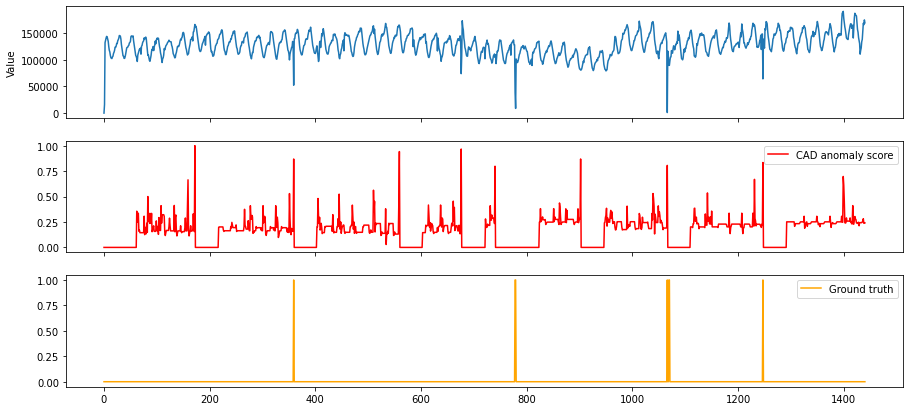

In [16]:
df = cums[28]
df["timestamp"] = pd.to_datetime(df["timestamp"])
fig, ax = plt.subplots(3, sharex=True, figsize=(15,7))
ax[0].plot(df["value"])
ax[0].set_ylabel("Value")
ax[1].plot(df["res_cadose"], "red", label="CAD anomaly score")
ax[2].plot(df["is_anomaly"], "orange", label="Ground truth")
ax[1].legend()
ax[2].legend()
fig.align_ylabels(ax)

In [4]:
anom_len = 3
for i in range(67):
    cums[i]["is_anomaly"] = cums[i]["is_anomaly"].shift(-1 * (anom_len - 1)).rolling(anom_len).max().fillna(0)

In [61]:
cums[0]

,timestamp,value,is_anomaly,res_htm,res_earthgecko,res_cadose,res_knn
213,2021-01-01 00:03:33,0.053211,0.0,0.138059,0.0,0.145833,0.206186
214,2021-01-01 00:03:34,0.099347,0.0,0.138059,0.0,0.145833,0.077320
215,2021-01-01 00:03:35,0.047275,0.0,0.138059,0.0,0.145833,0.221649
216,2021-01-01 00:03:36,0.091262,0.0,0.138059,0.0,0.145833,0.185567
217,2021-01-01 00:03:37,0.038593,0.0,0.138059,0.0,0.145833,0.087629
...,...,...,...,...,...,...,...
1415,2021-01-01 00:23:35,0.159675,0.0,0.039501,0.0,0.231760,0.391753
1416,2021-01-01 00:23:36,0.137626,0.0,0.040490,0.0,0.230769,0.396907
1417,2021-01-01 00:23:37,0.197441,0.0,0.040490,0.0,0.230769,0.432990
1418,2021-01-01 00:23:38,0.161966,0.0,0.040490,0.0,0.230769,0.402062


In [5]:
concated = pd.concat(cums)

In [6]:
positives = concated[concated["is_anomaly"] == 1]
negatives = concated[concated["is_anomaly"] == 0]

In [7]:
print(positives["res_htm"].mean())
print(positives["res_earthgecko"].mean())
print(positives["res_cadose"].mean())
print(positives["res_knn"].mean())
print(negatives["res_htm"].mean())
print(negatives["res_earthgecko"].mean())
print(negatives["res_cadose"].mean())
print(negatives["res_knn"].mean())

0.23648704811176266
0.014848950332821301
0.16812522192960822
0.5580454090066242
0.11699401582323438
0.00015247001423053467
0.22980640696977442
0.45358998950369683


In [8]:
def score_f1(positives, negatives, col_name, threshold):
    tp = (positives[col_name] >= threshold).sum()
    fp = (negatives[col_name] >= threshold).sum()
    fn = (positives[col_name] < threshold).sum()
#     print(tp, fp, fn)
#     print(tp / (tp + (fp + fn) / 2))
    return tp / (tp + (fp + fn) / 2)

In [9]:
def precision(positives, negatives, col_name, threshold):
    tp = (positives[col_name] >= threshold).sum()
    fp = (negatives[col_name] >= threshold).sum()
    return tp / (tp + fp)

In [10]:
def recall(positives, negatives, col_name, threshold):
    tp = (positives[col_name] >= threshold).sum()
    fn = (positives[col_name] < threshold).sum()
    return tp / (tp + fn)

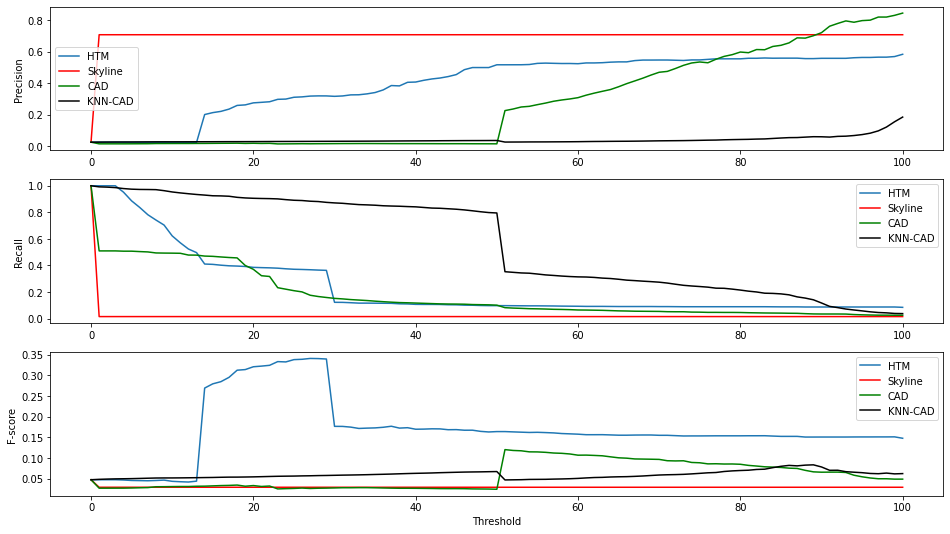

In [12]:
fig, axs = plt.subplots(3, figsize=(16, 9))
axs[0].plot([precision(positives, negatives, "res_htm", th / 100) for th in range(101)], label="HTM")
axs[0].plot([precision(positives, negatives, "res_earthgecko", th / 100) for th in range(101)], "red", label="Skyline")
axs[0].plot([precision(positives, negatives, "res_cadose", th / 100) for th in range(101)], "green", label="CAD")
axs[0].plot([precision(positives, negatives, "res_knn", th / 100) for th in range(101)], "black", label="KNN-CAD")
axs[0].set_ylabel("Precision")

axs[1].plot([recall(positives, negatives, "res_htm", th / 100) for th in range(101)], label="HTM")
axs[1].plot([recall(positives, negatives, "res_earthgecko", th / 100) for th in range(101)], "red", label="Skyline")
axs[1].plot([recall(positives, negatives, "res_cadose", th / 100) for th in range(101)], "green", label="CAD")
axs[1].plot([recall(positives, negatives, "res_knn", th / 100) for th in range(101)], "black", label="KNN-CAD")
axs[1].set_ylabel("Recall")

axs[2].plot([score_f1(positives, negatives, "res_htm", th / 100) for th in range(101)], label="HTM")
axs[2].plot([score_f1(positives, negatives, "res_earthgecko", th / 100) for th in range(101)], "red", label="Skyline")
axs[2].plot([score_f1(positives, negatives, "res_cadose", th / 100) for th in range(101)], "green", label="CAD")
axs[2].plot([score_f1(positives, negatives, "res_knn", th / 100) for th in range(101)], "black", label="KNN-CAD")
axs[2].set_ylabel("F-score")

axs[2].set_xlabel("Threshold")
axs[0].legend()
axs[1].legend()
axs[2].legend()

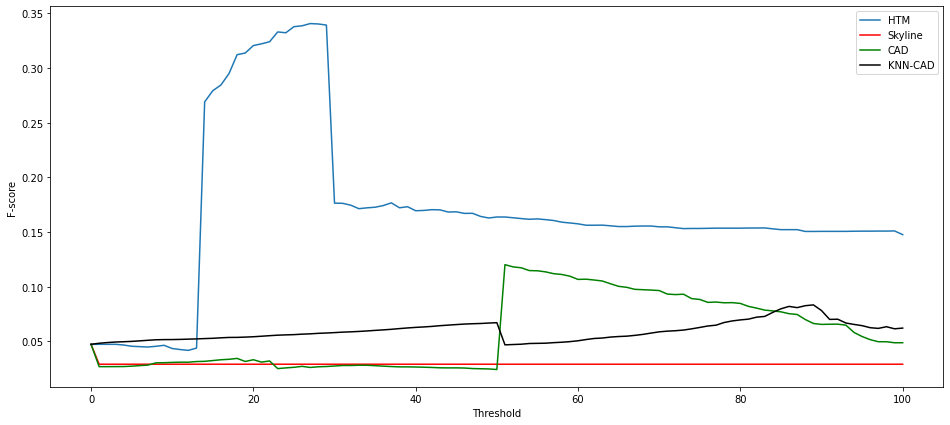

In [68]:
plt.figure(figsize=(16,7))
plt.plot([score_f1(positives, negatives, "res_htm", th / 100) for th in range(101)], label="HTM")
plt.plot([score_f1(positives, negatives, "res_earthgecko", th / 100) for th in range(101)], "red", label="Skyline")
plt.plot([score_f1(positives, negatives, "res_cadose", th / 100) for th in range(101)], "green", label="CAD")
plt.plot([score_f1(positives, negatives, "res_knn", th / 100) for th in range(101)], "black", label="KNN-CAD")
plt.xlabel("Threshold")
plt.ylabel("F-score")
plt.legend()

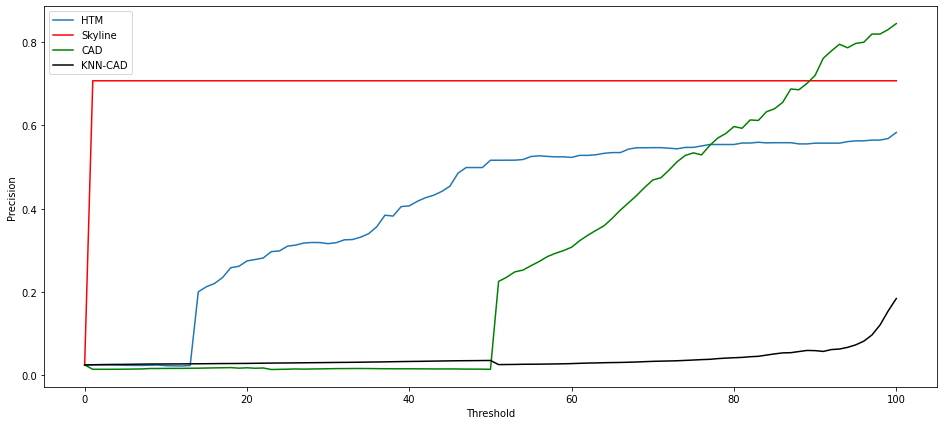

In [69]:
plt.figure(figsize=(16,7))
plt.plot([precision(positives, negatives, "res_htm", th / 100) for th in range(101)], label="HTM")
plt.plot([precision(positives, negatives, "res_earthgecko", th / 100) for th in range(101)], "red", label="Skyline")
plt.plot([precision(positives, negatives, "res_cadose", th / 100) for th in range(101)], "green", label="CAD")
plt.plot([precision(positives, negatives, "res_knn", th / 100) for th in range(101)], "black", label="KNN-CAD")
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.legend()

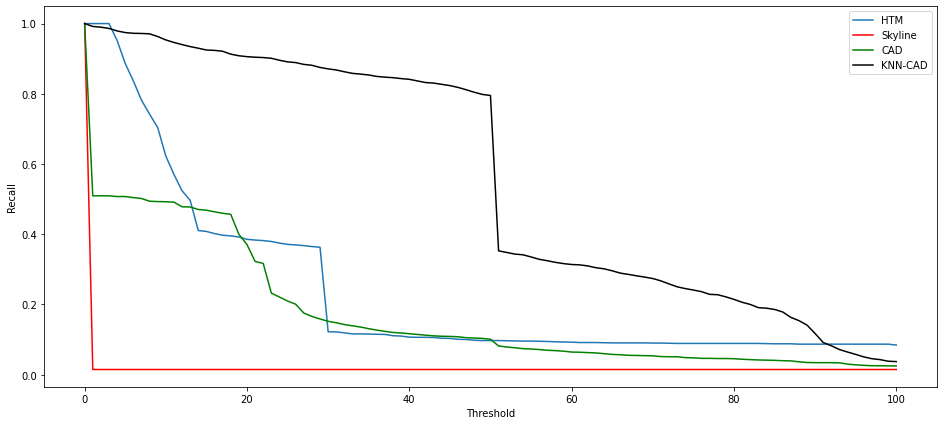

In [70]:
plt.figure(figsize=(16,7))
plt.plot([recall(positives, negatives, "res_htm", th / 100) for th in range(101)], label="HTM")
plt.plot([recall(positives, negatives, "res_earthgecko", th / 100) for th in range(101)], "red", label="Skyline")
plt.plot([recall(positives, negatives, "res_cadose", th / 100) for th in range(101)], "green", label="CAD")
plt.plot([recall(positives, negatives, "res_knn", th / 100) for th in range(101)], "black", label="KNN-CAD")
plt.xlabel("Threshold")
plt.ylabel("Recall")
plt.legend()

In [10]:
from sklearn.metrics import log_loss

In [11]:
print(log_loss(concated["is_anomaly"], concated["res_htm"]))
print(log_loss(concated["is_anomaly"], concated["res_earthgecko"]))
print(log_loss(concated["is_anomaly"], concated["res_cadose"]))
print(log_loss(concated["is_anomaly"], concated["res_knn"]))

0.22144499880007043
0.8851266325830958
0.7149019015278972
0.9160299044577483


In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd 

class Node:
  def __init__(self, left=None, right=None, r=0, l=0, split_attrib=0, split_value=0.0, depth=0):
      self.left = left
      self.right = right
      self.r = r
      self.l = l
      self.split_attrib = split_attrib
      self.split_value = split_value
      self.k = depth

def generate_max_min(dimensions):
    max_arr = np.zeros((dimensions))
    min_arr = np.zeros((dimensions))
    for q in range(dimensions):
      s_q = np.random.random_sample()
      max_value = max(s_q, 1-s_q)
      max_arr[q] = s_q + 2*max_value
      min_arr[q] = s_q - 2*max_value
    return max_arr, min_arr


def BuildSingleHSTree(max_arr, min_arr, k, h, dimensions):
  if k == h:
    return Node(depth=k)
  node = Node()
  q = np.random.randint(dimensions)
  p = (max_arr[q] + min_arr[q])/2.0
  temp = max_arr[q]
  max_arr[q] = p
  node.left = BuildSingleHSTree(max_arr, min_arr, k+1, h, dimensions)
  max_arr[q] = temp
  min_arr[q] = p
  node.right = BuildSingleHSTree(max_arr, min_arr, k+1, h, dimensions)
  node.split_attrib = q
  node.split_value = p
  node.k = k
  return node


def UpdateMass(x, node, ref_window):
  if(node):
    if(node.k != 0):
        
      if ref_window:
        node.r += 1
      else:
        node.l += 1
    if(x[node.split_attrib] > node.split_value):
      node_new = node.right
    else:
      node_new = node.left
    UpdateMass(x, node_new, ref_window)

def ScoreTree(x,node, k):
  s = 0
  if(not node):
    return s
  s += node.r * (2**k)

  if(x[node.split_attrib] >node.split_value):
    node_new = node.right
  else:
    node_new = node.left
  s += ScoreTree(x, node_new, k+1)
  return s

def UpdateResetModel(node):
  if(node):
    node.r = node.l
    node.l = 0
    UpdateResetModel(node.left)
    UpdateResetModel(node.right)


def StreamingHSTrees(X, psi, t, h):
  dimensions = X.shape[1]
  score_list = np.zeros((X.shape[0]))
  HSTree_list = []
  
  #Bulding t trees 
  for i in range(t):
    max_arr, min_arr = generate_max_min(dimensions)
    tree = BuildSingleHSTree(max_arr, min_arr, 0, h, dimensions)
    HSTree_list.append(tree)

# recording mass profile in HS-Trees
  for i in range(psi):
    for tree in HSTree_list:
      UpdateMass(X[i], tree, True)
      
  count = 0
  for i in range(X.shape[0]):
    x = X[i]
    s = 0
    for tree in HSTree_list:
      s = s + ScoreTree(x, tree, 0)
      UpdateMass(x, tree, False)
    #print(('Score is %f for instance %d') %(s, i))
    score_list[i] = s
    count += 1

    if count == psi:
      print('Reset tree')
      for tree in HSTree_list:
        UpdateResetModel(tree)
      count = 0
  return score_list


def accuracy_value(scores, y, num):
  tn = 0
  fp = 0
  tp = 0
  fn = 0
  ranks = np.argsort(scores)
  for rank in ranks[:num]:
    if y[rank] !=0:
      tp +=1
    else:
      fp += 1
  for rank in ranks[num:]:
    if y[rank] != 0:
      fn += 1
    else:
      tn += 1

  print(tp, fp, tn, fn)

In [3]:
def read_NAB_file(fname, folder):
    base = "NAB/results/"
    df = pd.read_csv(base + "NumentaTM/" + folder + "/NumentaTM_" + fname)
    return df
import glob
NAB = {}
for x in glob.glob("NAB/results/NumentaTM/*/*.csv"):
    f = x.split("\\")[-1].split("numentaTM_")[-1]
    fo = x.split("\\")[1]
    NAB[f"{fo}/{f}"] = read_NAB_file(f, fo)    
sum([f.shape[0] for _,f in NAB.items()])

365558

In [5]:
NAB_hs = {}
for k,d in NAB.items():
    X = d["value"].values.reshape((-1, 1))
    print(X.shape)
    scaler = MinMaxScaler()
    X_new = scaler.fit_transform(X)
    NAB_hs[k] = StreamingHSTrees(X_new, 250, 25, 15)

(4032, 1)
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
(4032, 1)
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
(4032, 1)
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
(4032, 1)
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
(4032, 1)
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
(4032, 1)
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset

Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
(1882, 1)
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
(5315, 1)
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
(2380, 1)
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
(2500, 1)
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
(2500, 1)
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
(1127, 1)
Reset tree
Reset tree
Reset tree
Reset tree
(2495, 1)
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset 

Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree


In [13]:
for k,d in NAB.items():
    d["pred_hs_raw"] = NAB_hs[k]
    d["hs_cummax"] = d["pred_hs_raw"].cummax().shift(1)
    d["pred_hs"] = d["pred_hs_raw"] / d["hs_cummax"]
    d["pred_hs"][0] = 1.0

<ipython-input-13-1f60e2992ed2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["pred_hs"][0] = 1.0


In [14]:
for k,d in NAB.items():
    plt.plot(d["value"])
    plt.twinx().plot(d["pred_hs"], "orange")
    n = k.replace("/", "")[:-4]
    plt.savefig(f"data_plots/NAB/{n}_hs.png")
    plt.close()

In [4]:
hs_res = []
for i in range(67):
    X = originals[i]["value"].values.reshape((-1, 1))
    y = originals[i]["is_anomaly"].values
    print(X.shape)
    print(y.shape)
    anomalies = np.nonzero(y)[0]
    print(anomalies.shape)
    scaler = MinMaxScaler()
    X_new = scaler.fit_transform(X)

    final_scores = StreamingHSTrees(X_new, 250, 25, 15)
    hs_res.append(final_scores)
    accuracy_value(final_scores, y, anomalies.shape[0])

(1420, 1)
(1420,)
(2,)
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
2 0 1418 0
(1439, 1)
(1439,)
(16,)
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
14 2 1421 2
(1461, 1)
(1461,)
(15,)
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
15 0 1446 0
(1423, 1)
(1423,)
(5,)
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
5 0 1418 0
(1439, 1)
(1439,)
(2,)
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
2 0 1437 0
(1439, 1)
(1439,)
(8,)
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
7 1 1430 1
(1423, 1)
(1423,)
(61,)
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
27 34 1328 34
(1420, 1)
(1420,)
(10,)
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
9 1 1409 1
(1461, 1)
(1461,)
(8,)
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
7 1 1452 1
(1439, 1)
(1439,)
(13,)
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
13 0 1426 0
(1439, 1)
(1439,)
(19,)
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
18 1 1419 1
(1439, 1

In [5]:
hs_res

[array([19772758.,  3794538.,  2121634., ...,   145988.,   419968.,
          736108.]),
 array([27922252., 14904652., 15397452., ...,   116918.,   100518.,
           56750.]),
 array([2.785560e+06, 4.583912e+06, 3.211240e+06, ..., 1.255200e+04,
        1.840000e+02, 1.855200e+04]),
 array([3.9617880e+06, 1.9064540e+07, 1.4836700e+07, ..., 3.0000000e+01,
        2.9896266e+07, 1.7446218e+07]),
 array([17774770.,  4650874.,  3665082., ...,  4778142.,  5502110.,
         5878174.]),
 array([3.5355760e+06, 8.9311040e+06, 1.3744368e+07, ..., 1.8366000e+04,
        3.2460000e+03, 1.0866000e+04]),
 array([3558236., 1945872., 1926236., ...,   24896.,    8960.,    7468.]),
 array([ 3882542., 13226134., 12040854., ...,    75270.,   109498.,
           59558.]),
 array([ 8454574., 11199534., 10245550., ...,  4262434.,  3446754.,
        11153058.]),
 array([2758098., 2758562., 2858562., ...,   12470.,   12470.,   12470.]),
 array([8212036., 5331268., 4444484., ..., 2128364., 1280236., 1183468.]

In [6]:
for i in range(67):
    originals[i]["hs_res"] = hs_res[i]

In [11]:
for i in range(67):
    originals[i].to_csv(f"data_results/HSTrees/hs_real_{i}.csv")

In [25]:
a = pd.read_csv("idosorok/A.csv")

X_new = scaler.fit_transform(a["value"].values[6000:].reshape((-1, 1)))

final_scores = StreamingHSTrees(X_new, 1000, 25, 15)

Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree
Reset tree

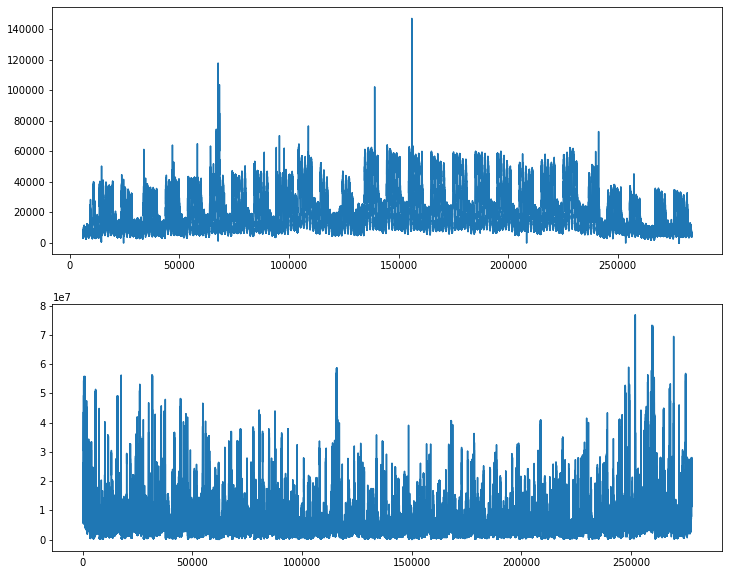

In [26]:
fig, axs = plt.subplots(2, figsize=(12, 10))
axs[0].plot(a["value"][6000:])
axs[1].plot(final_scores)